In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

# \pi' comparison between class and hi-class

In [93]:
# hiclass_cs0=np.loadtxt("./Kessence_hiclass_cs0.dat")
hiclass_cs1=np.loadtxt("./Kessence_field_cs1.dat")
hiclass_cs0=np.loadtxt("./Kessence_field_cs0.dat")
# class_cs0_sync=np.loadtxt("./class_kess_tk_cs0_synch.dat")
class_cs1_newt=np.loadtxt("./class_kess_cs1_newt_tk.dat")
class_cs0_newt=np.loadtxt("./class_kess_cs0_newt_tk.dat")
class_cs1_synch=np.loadtxt("./class_kess_cs1_synch_tk.dat")

field_camb_cs1=np.loadtxt("./Kesse_cs1_camb_PiSolution.dat")


# Hi-class file interpolate for a=1

In [94]:
data_hi = field_camb_cs1
# print(np.shape(data_hi))
# print(data_hi[:,1].max(),data_hi[:,1].min())

astar_hi=1. # z=0, desired redshift
ainterval_hi=0.01
mask_hi = np.logical_and(data_hi[:,0]>astar_hi-ainterval_hi, data_hi[:,0]<astar_hi+ainterval_hi)
# print (mask)
dataprime_hi = data_hi[mask_hi]
# print(dataprime)
# print(np.shape(dataprime))

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
#     consition[ii] =np.array_equal(dataprime[i,0],dataprime[i+1,0])
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,2],dataprime_hi[i+1,2]))
# print(condition[:200])

klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,2]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],6))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,2]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,2]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
Final_file_camb_cs1=np.zeros((np.shape(klist_hi)[0],3)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,2]!=0,:]
    interp_pi=interp1d(Vec_x_hi[:,0],Vec_x_hi[:,3])
    interp_pi_prime=interp1d(Vec_x_hi[:,0],Vec_x_hi[:,4])
    Final_file_camb_cs1[i,0]=klist_hi[i]
#     Final_file_camb_cs0[i,1]=astar_camb
    Final_file_camb_cs1[i,1]=interp_pi(astar_hi)
    Final_file_camb_cs1[i,2]=interp_pi_prime(astar_hi)
    #     interp_pi_prime_prime=interp1d(Vec_x[:,1], Vec_x[:,4])
Final_file_camb_cs1[:10,:]

array([[  7.03510497e-06,  -2.61722421e-04,  -2.74858306e-08],
       [  7.76705255e-06,  -3.19012557e-04,  -3.35016629e-08],
       [  8.57515353e-06,  -3.88842429e-04,  -4.08338978e-08],
       [  9.46733110e-06,  -4.73956325e-04,  -4.97704564e-08],
       [  1.04523327e-05,  -5.77698906e-04,  -6.06621659e-08],
       [  1.15398161e-05,  -7.04146448e-04,  -7.39364716e-08],
       [  1.27404436e-05,  -8.58266734e-04,  -9.01141211e-08],
       [  1.40659870e-05,  -1.04611380e-03,  -1.09829458e-07],
       [  1.55294427e-05,  -1.27506514e-03,  -1.33855094e-07],
       [  1.71451596e-05,  -1.55411052e-03,  -1.63131890e-07]])

In [95]:
data_hi = hiclass_cs0
astar_hi=1. # z=0, desired redshift
ainterval_hi=0.01
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])

#     interp_pi_prime=interp1d(Vec_x[:,1], Vec_x[:,3], kind='cubic')
#     interp_pi_prime_prime=interp1d(Vec_x[:,1], Vec_x[:,4], kind='cubic')
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
# hiclass_cs0_fin[:100,5]

In [96]:
data_hi = hiclass_cs1
astar_hi=1. # z=0, desired redshift
ainterval_hi=0.01
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi1 = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi1[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi1)
hiclass_cs1_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi1[i,dataprime_separated_hi1[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])

#     interp_pi_prime=interp1d(Vec_x[:,1], Vec_x[:,3], kind='cubic')
#     interp_pi_prime_prime=interp1d(Vec_x[:,1], Vec_x[:,4], kind='cubic')
    hiclass_cs1_fin[i,0]=klist_hi[i]
    hiclass_cs1_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs1_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs1_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs1_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs1_fin[i,5]=interp_psi(astar_hi)
#     hiclass_cs1_fin[:,1]=hiclass_cs1_fin[:,1]
# hiclass_cs0_fin[:10,1]-2*(hiclass_cs1_fin[:10,1]-hiclass_cs1_fin[:10,2])
# hiclass_cs1_fin_me=hiclass_cs1_fin[:,1]-2*(hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,2])
# hiclass_cs1_fin[:10,:3]

# CAMB hi-class \pi synch comparison

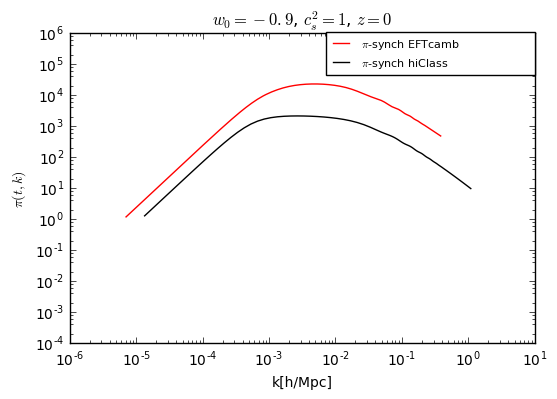

In [149]:
cs0=10**-8;
w0=-0.9999;
cs1=1.;
w1=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05;
Hubb=2.25e-4;
# psi=hiclass_cs0[:,4]
deltaR2=2*np.pi**2*As*(hiclass_cs1_fin[:,0]/kp)**(ns-1)/((hiclass_cs1_fin[:,0]*h)**(3))
plt.plot(Final_file_camb_cs1[:,0],-Final_file_camb_cs1[:,1]/Hubb,color="Red",label=r"$\pi$-synch EFTcamb")
# plt.plot(class_cs1_newt[:111,0]/h,pi_synch_class_cs1[:111],color="Green",label=r"$\pi$-synch class")

plt.plot(hiclass_cs1_fin[:,0]/h,hiclass_cs1_fin[:,1],color="black",label=r"$\pi$-synch hiClass")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=1$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi(t,k)$")
plt.ylim(10e-5,10e5)
plt.savefig('eft_hiclass.jpg',bbox_inches='tight')
plt.show()

#  \pi _Newtonian comparison in Class and hi-class

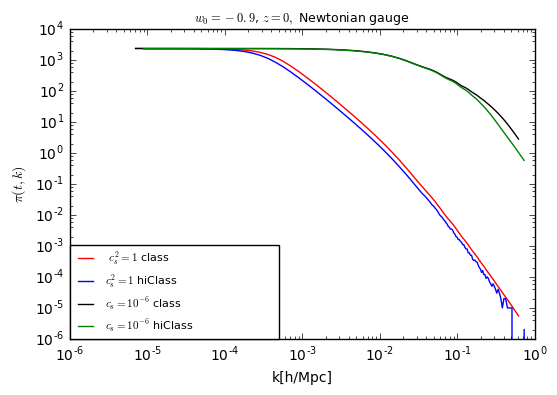

In [136]:
cs2=1.
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
h=0.67

pi_newt_class_cs1=class_cs1_newt[:,12]/((class_cs1_newt[:,0]*h)**2);
pi_newt_class_cs0=class_cs0_newt[:,12]/((class_cs0_newt[:,0]*h)**2);

# pi_class_synch_cs1=class_cs1_synch[:111,12]/((class_cs1_synch[:111,0]*h)**2)+hiclass_cs1_fin[:111,3];

# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
pi_newt_hiclass_cs1=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3];
pi_newt_hiclass_cs0=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,3];

# pi_synch_hiclass_cs1=hiclass_cs1_fin[:,1];


# plt.plot(class_cs1_synch[:111,0]*h,-pi_class_synch_cs1[:111],color="Red",label=r"$\pi$-synch class")
plt.plot(class_cs1_newt[:111,0]*h,pi_newt_class_cs1[:111],color="red",label=r" $c_s^2=1$ class")
plt.plot(hiclass_cs1_fin[:,0],-pi_newt_hiclass_cs1[:],color="blue",label=r"$c_s^2=1$ hiClass")

plt.plot(class_cs0_newt[:111,0]*h,pi_newt_class_cs0[:111],color="black",label=r"$c_s=10^{-6}$ class")

plt.plot(hiclass_cs1_fin[:,0],-pi_newt_hiclass_cs0[:],color="green",label=r"$c_s=10^{-6}$ hiClass")

plt.legend(bbox_to_anchor=(0.0, 0.2, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$"+" Newtonian gauge",fontsize=9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$-\pi(t,k)$")
# plt.ylim(-30,0.11)
plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

#  \pi' _Newtonian comparison in Class and hi-class

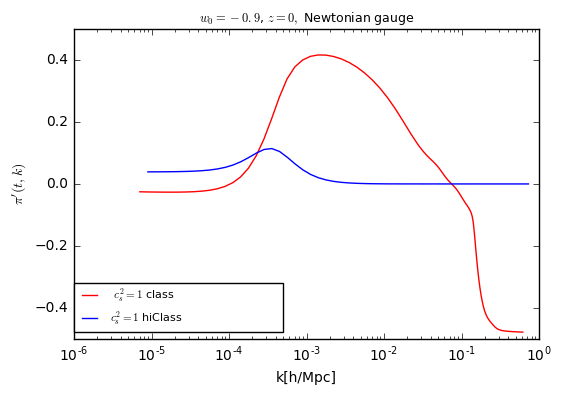

In [241]:
cs12=1.
cs02=10**-6
w0=-0.9
coeff1=(cs12)/(1+w0);
coeff0=(cs02)/(1+w0);
Hubb=2.25*10**-4;
h=0.67

pi_prime_newt_class_cs1=(coeff1*(class_cs1_newt[:111,4])+3.*cs12*Hubb*class_cs1_newt[:111,12]/((class_cs1_newt[:111,0]*h)**2)+hiclass_cs1_fin[:,5]);
pi_prime_newt_class_cs0=(coeff0*class_cs0_newt[:111,4]+3.*cs02*Hubb*class_cs0_newt[:111,12]/((class_cs0_newt[:111,0]*h)**2)+hiclass_cs0_fin[:,5]);
pi_prime_newt_hiclass_cs1= hiclass_cs1_fin[:,2]-hiclass_cs1_fin[:,4];
pi_prime_newt_hiclass_cs0=hiclass_cs0_fin[:,2]-hiclass_cs0_fin[:,4];
# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
# pi_newt_hiclass_cs1=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3];
# pi_newt_hiclass_cs0=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,3];

# pi_synch_hiclass_cs1=hiclass_cs1_fin[:,1];


plt.plot(class_cs1_newt[:111,0]*h,-pi_prime_newt_class_cs1[:111],color="red",label=r" $c_s^2=1$ class")
plt.plot(hiclass_cs1_fin[:,0],pi_prime_newt_hiclass_cs1[:],color="blue",label=r"$c_s^2=1$ hiClass")

# plt.plot(class_cs0_newt[:111,0]*h,-pi_prime_newt_class_cs0[:111],color="black",label=r" $c_s^2=10^{-6}$ class")
# plt.plot(hiclass_cs0_fin[:,0],pi_prime_newt_hiclass_cs0[:],color="green",label=r"$c_s^2=10^{-6}$ hiClass")

plt.legend(bbox_to_anchor=(0.0, 0.08, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$"+" Newtonian gauge",fontsize=9)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi'(t,k)$")
plt.ylim(-0.5,0.5)
plt.savefig('pi_prime_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

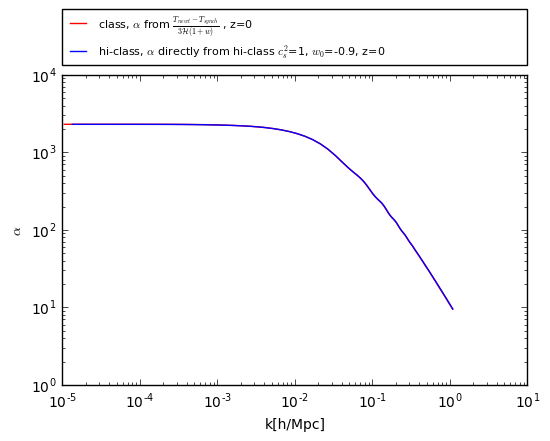

In [216]:
plt.plot(class_cs1_synch[:,0],-(-class_cs1_synch[:,4]+class_cs1_newt[:,4])/(0.3*Hubb),color="red",label=r"class, $\alpha$ from $\frac{T_{newt}-T_{synch}}{3\mathcal{H}(1+w)}$ , z=0")
plt.plot(hiclass_cs1_fin[:,0]/h,hiclass_cs1_fin[:,3],color="blue",label=r"hi-class, $\alpha$ directly from hi-class $c_s^2$=1, $w_0$=-0.9, z=0")
plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), fontsize=8,loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\alpha$")
# plt.ylim(-1.,0.22)
# plt.savefig('Kessence-smgfld_comp.jpg',bbox_inches='tight')
plt.show()

# \pi comparison in hi-class and class

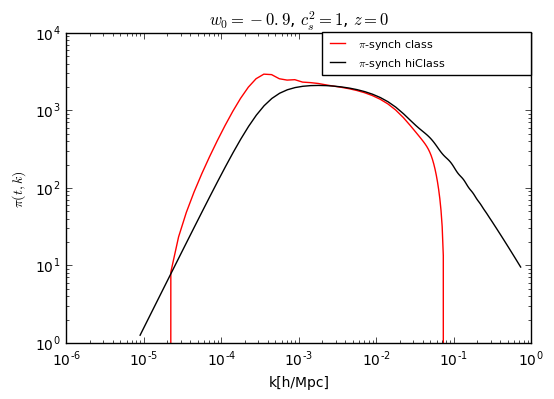

In [114]:
cs2=1.
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
h=0.67

pi_newt_class_cs1=class_cs1_newt[:,12]/((class_cs1_newt[:,0]*h)**2);
pi_class_synch_cs1=class_cs1_synch[:111,12]/((class_cs1_synch[:111,0]*h)**2)+hiclass_cs1_fin[:111,3];

# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
pi_newt_hiclass_cs1=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3];

pi_synch_hiclass_cs1=hiclass_cs1_fin[:,1];


plt.plot(class_cs1_synch[:111,0]*h,-pi_class_synch_cs1[:111],color="Red",label=r"$\pi$-synch class")
# plt.plot(class_cs1_newt[:111,0]/h,pi_synch_class_cs1[:111],color="Green",label=r"$\pi$-synch class")
plt.plot(hiclass_cs1_fin[:,0],pi_synch_hiclass_cs1[:],color="black",label=r"$\pi$-synch hiClass")
# plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,1],color="blue",label=r"$\pi$-synch hiClass")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=1$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi(t,k)$")
# plt.ylim(-30,0.11)
plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

In [101]:
plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,5],color="Blue",label="hi-class_psi")
plt.plot(psi_class[:,0],psi_class[:,2],color="Red",label="Class_Newt_psi")
# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.65, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\psi(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

NameError: name 'psi_class' is not defined

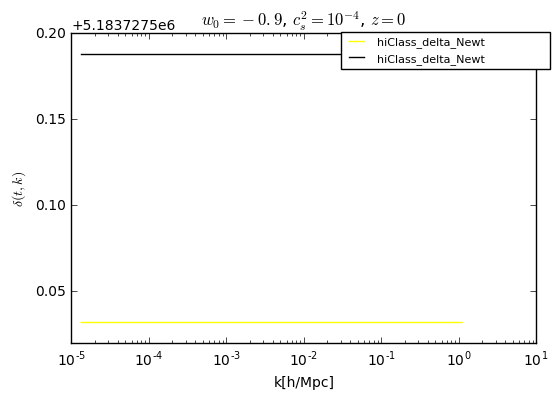

In [65]:
cs2=1.
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
h=0.67
# As=2.215*10.e-9
# ns=0.96
# kp=0.05
# deltaR2=2*np.pi**2*As*(hiclass_cs0_fin[:,0]/kp)**(ns-1)/((hiclass_cs0_fin[:,0])**(3))
deltaclass_cs1=class_cs1_newt[:,4];
# psi_cs0=hiclass_cs0_fin[:,5];
psi_cs1=hiclass_cs1_fin[:,5];
hi_newt_pi_prime=hiclass_cs1_fin[:,2]+hiclass_cs1_fin[:,4]
delta_Newt_hiclass_c1=0.1*(-H*hiclass_cs1_fin[:,3]+hiclass_cs1_fin[:,2]);
delta_synch_hiclass_c1=delta_Newt_hiclass_c1-3*(1+w0)*H*hiclass_cs1_fin[:,3]

delta_Newt_hiclass_c0=10**7*(-H*hiclass_cs0_fin[:,3]+hiclass_cs0_fin[:,2]);
delta_synch_hiclass_c0=delta_Newt_hiclass_c0-3*(1+w0)*H*hiclass_cs0_fin[:,3]
# pi_primeclass_newt=10*(deltaclass_cs1[:111])+psi_cs1[:111]
# pi_primeclass_synch=pi_primeclass_newt[:111]-10*hiclass_cs1_fin[:,4];
# pi_newt_class=
# pi_synch_class=
# pi_class_cs0=10.**-3*(deltaclass_cs0[:111])+psi_cs0[:111]
# pi_class_cs1=10.*(deltaclass_cs1[:111])+psi_cs1[:111]
# alpha=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,2];

# alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
# alpha_prime=hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,4];
# pi_prime_newt_2transform=hiclass_cs0_fin[:,3]-alpha_prime[:]-alpha
# delta2=wovecs2*(pi_prime_newt_2transform[:]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
# plt.plot(class_cs1_newt_org[:111,0],pi_primeclass_cs1[:]*np.sqrt(deltaR2[:111]),color="black",label="Class_Newt_cs2=10**-2,w=-0.9")
# plt.plot(class_cs0_newt[:111,0]/h,pi_primeclass_cs0[:],color="Blue",label="Class_Newt_cs2=1,w=-0.9")
# plt.plot(hiclass_cs1_fin[:,0]/h,-delta_Newt_hiclass[:],color="Magenta",label="hiClass_delta_Newt")
# plt.plot(class_cs1_synch[:,0],-class_cs1_synch[:,4],color="red",label="class_Synch")
# plt.plot(class_cs0_newt[:,0],-class_cs0_newt[:,4],color="blue",label="class_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_Newt_hiclass_c0[:],color="Yellow",label="hiClass_delta_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_synch_hiclass_c0[:],color="black",label="hiClass_delta_Newt")

plt.legend(bbox_to_anchor=(0.58, 0.9, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\delta(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

# \theta comparison in hi-class and class

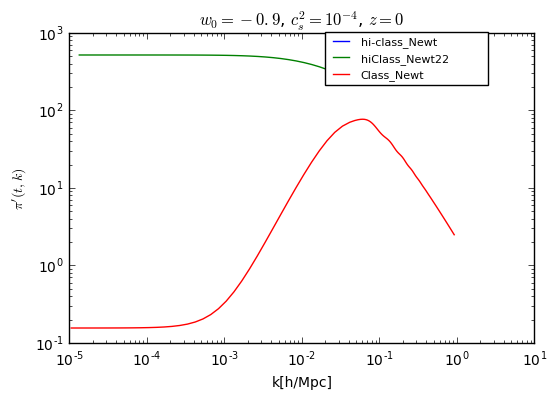

In [24]:
cs2=10.**-4
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
alpha_prime=hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,4];
pi_prime_newt_2transform=hiclass_cs0_fin[:,3]-alpha_prime[:]-alpha
delta2=wovecs2*(pi_prime_newt_2transform[:]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5]);
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_hi_newt[:],color="Blue",label="hi-class_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta2[:],color="Green",label="hiClass_Newt22")

plt.plot(class_cs0_newt[:111,0],-class_cs0_newt[:111,4],color="Red",label="Class_Newt")

# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi'(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

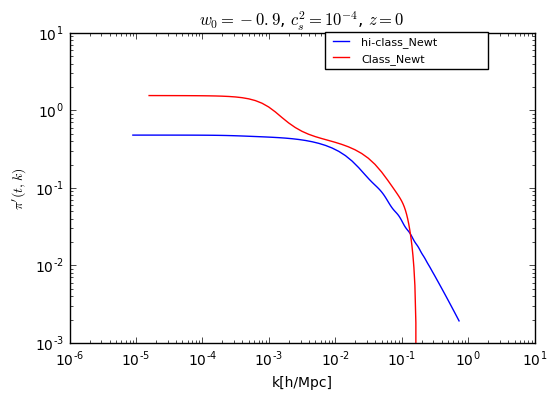

In [29]:
cs2=10.**-8
w0=-0.9
csoverw=cs2/(1+w0);
alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
h=0.67
plt.plot(hiclass_cs1_fin[:,0],(hiclass_cs1_fin[:,5]),color="Blue",label="hi-class_Newt")
plt.plot(class_cs1_newt[:111,0]/h,-(10*class_cs1_newt[:111,4]+hiclass_cs1_fin[:111,5]),color="Red",label="Class_Newt")
# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi'(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

1.0000000000000002e-07